<center>
<h1> Assignment 4: Multi-Classification</h1>
<hr>
<h2> Handwritten Digits Image Classification </h2>
<hr>
<h3> MCIS 6283-Machine Learning </h3>

<h3><mark>Due date: April 7, 2022, 11.59 pm</mark></h3>
<h3>Total Points: 100</h3>

<h4>Instructor: Dr. Mohammad Bhuiyan</h4>


</center>

### Please put your name, student ID, date and time here 
* Name: Saranya Balasubramaniyan
* Student ID: 999901316
* Date: April 03,2022
* Time: 5:30 PM

* In this assignment, you will investigate the handwritten digits dataset.

* Please apply the folowing eight methods to classify the handwritten digits dataset.
* Split the dataset into training sets and test sets
* Fit the training data sets to the following eight algorithms
* Print the classification report on the test data sets

<h4>Method 1: KNN</h4>
<h4>Method 2: Linear SVM</h4>
<h4>Method 3: Gaussian Kernel SVM</h4>
<h4>Method 4: Naive Bayes</h4>
<h4>Method 5: Decision Tree</h4>   
<h4>Method 6: Random Forest</h4> 
<h4>Method 7: Voting Classifier</h4> 
<h4>Method 8: Bagging</h4> 

In [36]:
# Importing the dataset
from sklearn.datasets import load_digits
digits = load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

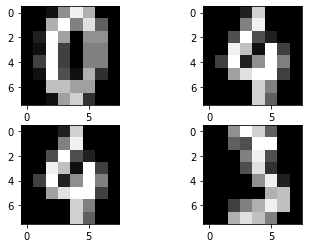

In [37]:
import matplotlib.pyplot as plt
digits.images[0].shape
list = [10,100,100,45]
fig = plt.figure()
for i,j in enumerate(list):
    plt.subplot(2,2,i+1)
    plt.imshow(digits.images[j],cmap='gray')

In [38]:
X =  digits.data
y =  digits.target

## Step 1. Split the dataset into training data and testing data (<mark>10 points</mark>)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0, stratify = y)

## Step 2. Algorithm Analysis (<mark>80 points</mark>)

## Method 1. KNN

[[59  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 59  0  0  0  0  0  0  0]
 [ 0  0  0 58  0  1  0  1  0  1]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 61  0  0  0  0]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 60  0  0]
 [ 0  3  0  1  0  0  0  0 54  0]
 [ 0  0  0  2  0  0  0  0  0 58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.94      1.00      0.97        61
           2       1.00      1.00      1.00        59
           3       0.95      0.95      0.95        61
           4       1.00      0.98      0.99        60
           5       0.98      1.00      0.99        61
           6       1.00      1.00      1.00        60
           7       0.98      1.00      0.99        60
           8       1.00      0.93      0.96        58
           9       0.98      0.97      0.97        60

    accuracy                           0.98       599
   macro avg       

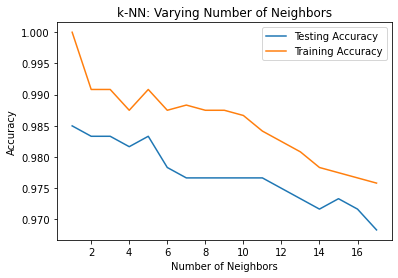

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, p = 2)
# Fitting classifier to the Training set
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
report = classification_report(y_test, y_pred)
print(report)

#precision = TP/(TP+FP)
print("pre_0 {0:.2f}".format(78/(78+7)))
print("pre_1 {0:.2f}".format(41/(41+8)))

#recall = TP / (TP + FN)
print("recall_0 {0:.2f}".format(78/(78+8)))
print("recall_1 {0:.2f}".format(41/(41+7)))

#Micro
print("micro {0:.2f}".format((78+41)/(78+41+7+8)))

#Macro
print("macro {0:.2f}".format((0.92+0.84)/2))

#Weighted
print("weighted {0:.2f}".format(86/134*0.92+48/134*0.84))

import numpy as np

###Overfitting and underfitting

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 18)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generating plot
plt.figure()
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Method 2. Linear SVM

In [41]:
from sklearn.svm import SVC # "Support vector classifier"
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
# Predicting the Test set results
y_pred = linear_svm.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       0.94      1.00      0.97        61
           2       1.00      1.00      1.00        59
           3       0.98      0.97      0.98        61
           4       1.00      1.00      1.00        60
           5       0.95      1.00      0.98        61
           6       1.00      0.97      0.98        60
           7       0.98      1.00      0.99        60
           8       1.00      0.90      0.95        58
           9       0.97      0.97      0.97        60

    accuracy                           0.98       599
   macro avg       0.98      0.98      0.98       599
weighted avg       0.98      0.98      0.98       599



## Method 3. Gaussian Kernal SVM

In [42]:
kernal_rbf = SVC(kernel='rbf')
kernal_rbf.fit(X_train, y_train)
y_pred = kernal_rbf.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.94      1.00      0.97        61
           2       1.00      1.00      1.00        59
           3       1.00      0.97      0.98        61
           4       0.98      0.97      0.97        60
           5       0.97      1.00      0.98        61
           6       1.00      1.00      1.00        60
           7       0.98      1.00      0.99        60
           8       0.96      0.93      0.95        58
           9       1.00      0.98      0.99        60

    accuracy                           0.98       599
   macro avg       0.98      0.98      0.98       599
weighted avg       0.98      0.98      0.98       599



## Method 4. Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        59
           1       0.79      0.82      0.81        61
           2       0.94      0.53      0.67        59
           3       0.91      0.64      0.75        61
           4       0.93      0.88      0.91        60
           5       0.95      0.87      0.91        61
           6       0.98      0.97      0.97        60
           7       0.83      1.00      0.91        60
           8       0.46      0.93      0.62        58
           9       0.93      0.65      0.76        60

    accuracy                           0.82       599
   macro avg       0.87      0.82      0.83       599
weighted avg       0.87      0.82      0.83       599



## Method 5. Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
# Predicting the Test set results
y_pred = clf_dt.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)                  

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        59
           1       0.79      0.72      0.75        61
           2       0.93      0.86      0.89        59
           3       0.82      0.77      0.80        61
           4       0.82      0.82      0.82        60
           5       0.93      0.89      0.91        61
           6       0.89      0.90      0.89        60
           7       0.87      0.92      0.89        60
           8       0.68      0.83      0.74        58
           9       0.75      0.73      0.74        60

    accuracy                           0.84       599
   macro avg       0.84      0.84      0.84       599
weighted avg       0.84      0.84      0.84       599



## Method 6. Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 300)
rf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = rf.predict(X_test)
print("training accuracy: {:.3f}".format(rf.score(X_train,y_train)))
print("testing accuracy: {:.3f}".format(rf.score(X_test,y_test)))

report = classification_report(y_test, y_pred)
print(report)

training accuracy: 1.000
testing accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        59
           3       0.97      0.95      0.96        61
           4       0.97      0.98      0.98        60
           5       0.94      0.98      0.96        61
           6       1.00      0.98      0.99        60
           7       0.95      1.00      0.98        60
           8       1.00      0.95      0.97        58
           9       0.97      0.93      0.95        60

    accuracy                           0.97       599
   macro avg       0.98      0.97      0.98       599
weighted avg       0.98      0.97      0.97       599



## Method 7. Voting Classifier

In [46]:
from sklearn.ensemble import VotingClassifier

# Instantiate individual classifiers
SEED = 1
rf = RandomForestClassifier(n_estimators = 300)
knn = KNeighborsClassifier(n_neighbors = 3, p = 2)
dt = DecisionTreeClassifier(random_state = SEED)
nb = GaussianNB()
kernal_rbf = SVC(kernel='rbf')
kernal_poly = SVC(kernel='poly',degree=3)
linear_svm = SVC(kernel='linear')

#Define a list called classifier that contains
#the tuples (classifier_name, classifier)
classifiers = [('Random Forest',rf),
               ('K Nearest Neighbours',knn),
               ('Classification Tree',dt),
               ('Naive',nb),
               ('RBF',kernal_rbf),
               ('POLY',kernal_poly),
               ('SVM',linear_svm)]

#Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)
#Fit 'vc' to the train set
vc.fit(X_train,y_train)
#Predict test set labels
y_pred = vc.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.95      1.00      0.98        61
           2       1.00      1.00      1.00        59
           3       0.98      0.97      0.98        61
           4       0.97      1.00      0.98        60
           5       0.97      1.00      0.98        61
           6       1.00      0.98      0.99        60
           7       0.98      1.00      0.99        60
           8       1.00      0.95      0.97        58
           9       1.00      0.97      0.98        60

    accuracy                           0.98       599
   macro avg       0.99      0.98      0.98       599
weighted avg       0.99      0.98      0.98       599



## Method 8. Bagging

In [48]:
from sklearn.ensemble import BaggingClassifier
# Instantiate a classifier KNN
knn = KNeighborsClassifier(n_neighbors = 3, p = 2)
# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=knn, n_estimators = 100, n_jobs=-1)

#Fit 'bc' to the train set
bc.fit(X_train,y_train)
#Predict test set labels
y_pred = bc.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        59
           3       0.95      0.97      0.96        61
           4       1.00      1.00      1.00        60
           5       0.97      1.00      0.98        61
           6       1.00      1.00      1.00        60
           7       0.98      1.00      0.99        60
           8       1.00      0.95      0.97        58
           9       1.00      0.95      0.97        60

    accuracy                           0.99       599
   macro avg       0.99      0.99      0.99       599
weighted avg       0.99      0.99      0.99       599



## Step 3: Accuracy Results Table (<mark>8 points</mark>)

<table>
    <thead>
        <tr>
            <th></th>
            <th>KNN</th>
            <th>L_SVM</th>
            <th>RBF_SVM</th>
            <th>NB</th>
            <th>DT</th>
            <th>RF</th>
            <th>Voting</th>
            <th>Bagging</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Accuracy</td>
            <td>0.98</td>
            <td>0.98</td>
            <td>0.98</td>
            <td>0.82</td>
            <td>0.85</td>
            <td>0.97</td>
            <td>0.98</td>
            <td>0.99</td>
        </tr>
        <tr>
            <td>Weighted Precision</td>
            <td>0.98</td>
            <td>0.98</td>
            <td>0.98</td>
            <td>0.87</td>
            <td>0.85</td>
            <td>0.97</td>
            <td>0.99</td>
            <td>0.99</td>
        </tr>
        <tr>
            <td>Weighted Recall</td>
            <td>0.98</td>
            <td>0.98</td>
            <td>0.98</td>
            <td>0.82</td>
            <td>0.85</td>
            <td>0.97</td>
            <td>0.98</td>
            <td>0.99</td>
        </tr>
    </tbody>
</table>

## Step 4: Conclusion (<mark>2 Points</mark>)

In [ ]:
For the given data in the digits, Bagging method has the highest Accuracy, Weighted Precision and Weighted Recall. 

In [ ]:
On multiple executions, it is observed that even Voting method exhibits high values of Weighted Precision, Accuracy and Recall

In [ ]:
The least value of Accuracy and Weighted Recall is observed in Naive Bayes Method and the least value of Precision is observed in Decision Tree.

In [ ]:
So Bagging is the best classifier for the given data.